## Nạp dữ liệu

In [43]:
import pandas as pd

data = pd.read_csv('movieoffical.csv')

# Đổi tên các cột cho dễ sử dụng
data.columns = ['name', 'year', 'watchtime', 'genre', 'classification', 'rating', 'metascore', 'votes', 'gross', 'description', 'id', 'keywords']

data.head()

,name,year,watchtime,genre,classification,rating,metascore,votes,gross,description,id,keywords
0,Avatar,2009,162,"Action, Adventure, Fantasy",PG-13,7.9,83.0,"1,382,237","2,923,706,026",A paraplegic Marine dispatched to the moon Pan...,19995.0,"culture clash, future, space war, space colony..."
1,Titanic,1997,194,"Drama, Romance",PG-13,7.9,75.0,"1,275,021","2,264,743,305",A seventeen-year-old aristocrat falls in love ...,597.0,"shipwreck, iceberg, ship, panic, titanic, ocea..."
2,Jurassic World,2015,124,"Action, Adventure, Sci-Fi",PG-13,6.9,59.0,"677,317","1,671,537,444","A new theme park, built on the original site o...",135397.0,"monster, dna, tyrannosaurus rex, velociraptor,..."
3,The Avengers,2012,143,"Action, Sci-Fi",PG-13,8.0,69.0,"1,455,536","1,520,538,536",Earth's mightiest heroes must come together an...,24428.0,"new york, shield, marvel comic, superhero, bas..."
4,Furious 7,2015,137,"Action, Crime, Thriller",PG-13,7.1,67.0,"413,630","1,515,341,399",Deckard Shaw seeks revenge against Dominic Tor...,168259.0,"car race, speed, revenge, suspense, car, race,..."


In [44]:
# Chuyển đổi các cột votes và gross sang kiểu số
data['votes'] = data['votes'].str.replace(',', '').astype(int)
data['gross'] = data['gross'].str.replace(',', '').astype(float)

In [45]:
# Xử lý dữ liệu thiếu
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())  

non_numeric_columns = data.select_dtypes(exclude=['number']).columns
data[non_numeric_columns] = data[non_numeric_columns].fillna('Unknown') 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1001 non-null   object 
 1   year            1001 non-null   int64  
 2   watchtime       1001 non-null   int64  
 3   genre           1001 non-null   object 
 4   classification  1001 non-null   object 
 5   rating          1001 non-null   float64
 6   metascore       1001 non-null   float64
 7   votes           1001 non-null   int32  
 8   gross           1001 non-null   float64
 9   description     1001 non-null   object 
 10  id              1001 non-null   float64
 11  keywords        1001 non-null   object 
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 90.1+ KB


In [46]:
data.isnull().sum() 

name              0
year              0
watchtime         0
genre             0
classification    0
rating            0
metascore         0
votes             0
gross             0
description       0
id                0
keywords          0
dtype: int64

## Thăm dò dữ liệu

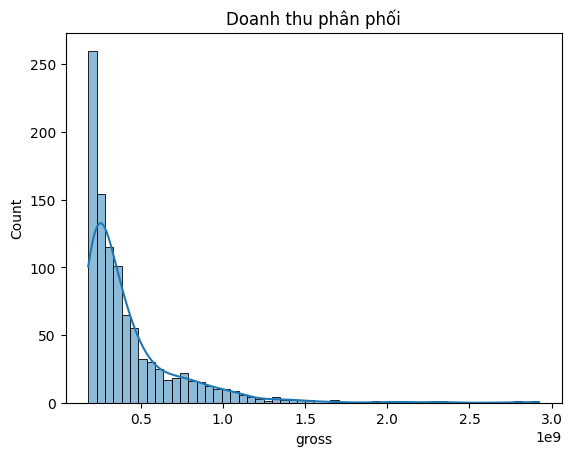

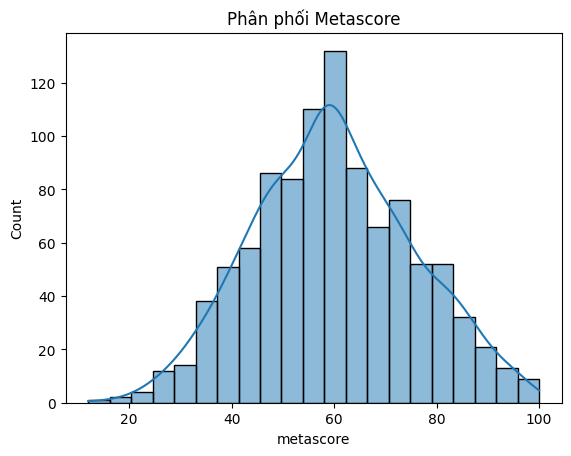

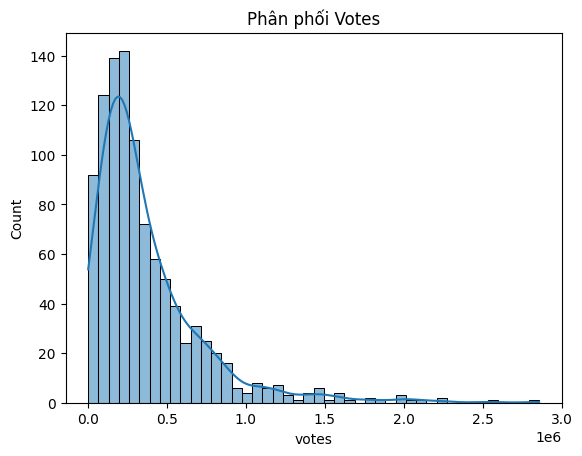

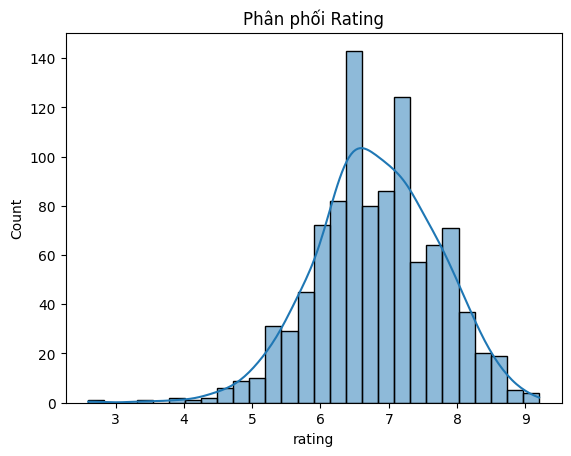

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ phân phối
sns.histplot(data['gross'], kde=True)
plt.title('Doanh thu phân phối')
plt.show()

sns.histplot(data['metascore'], kde=True)
plt.title('Phân phối Metascore')
plt.show()

sns.histplot(data['votes'], kde=True)
plt.title('Phân phối Votes')
plt.show()

sns.histplot(data['rating'], kde=True)
plt.title('Phân phối Rating')
plt.show()

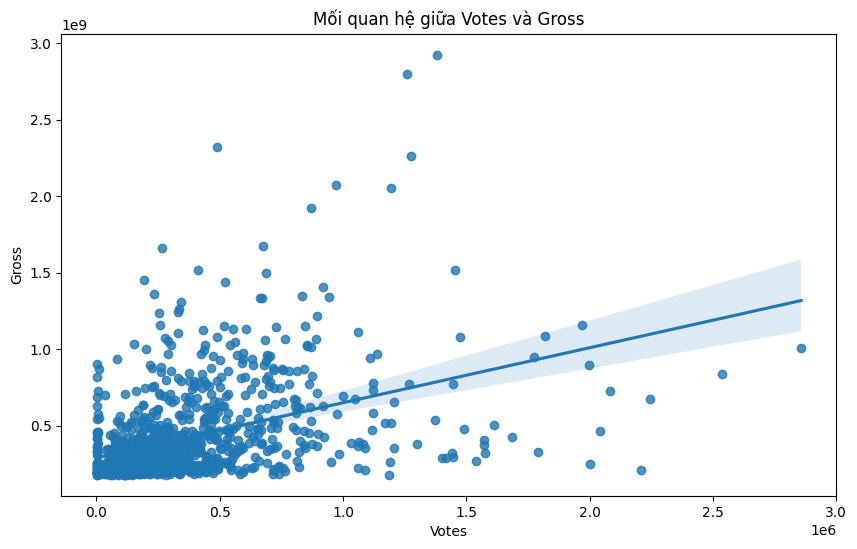

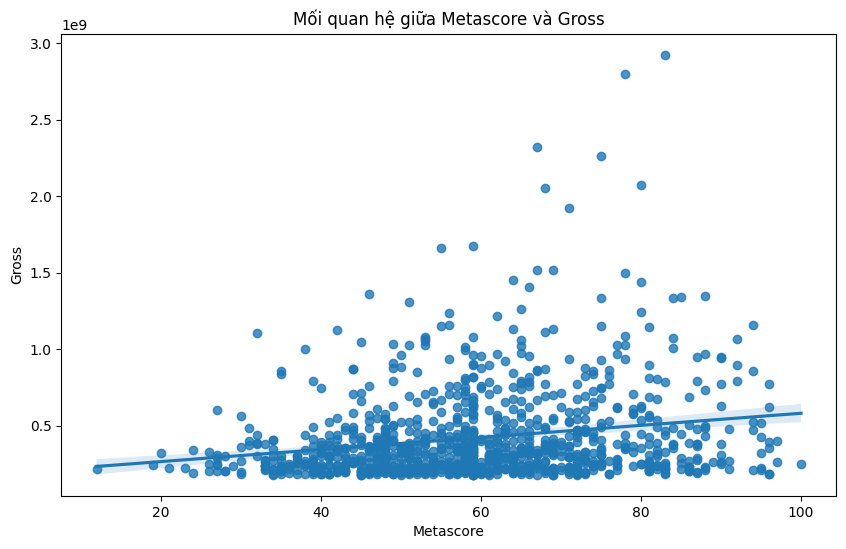

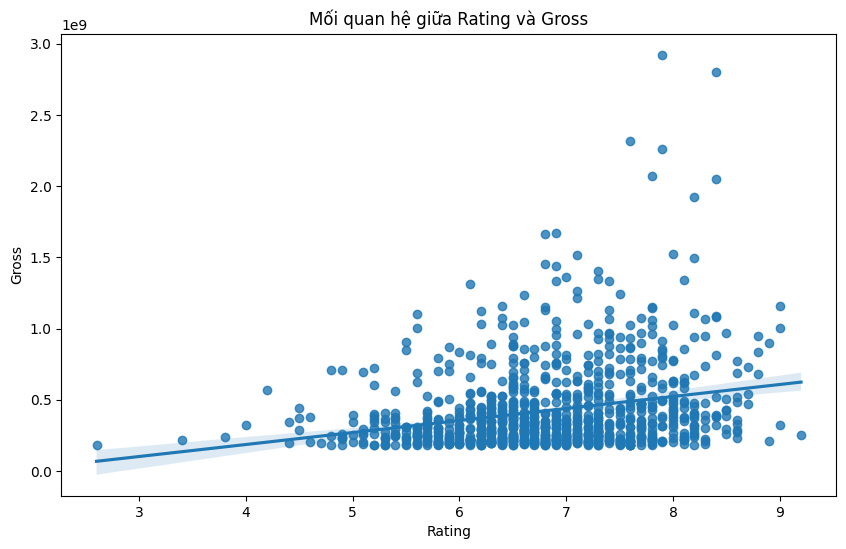

In [48]:
plt.figure(figsize=(10, 6))
sns.regplot(x='votes', y='gross', data=data)
plt.title('Mối quan hệ giữa Votes và Gross')
plt.xlabel('Votes')
plt.ylabel('Gross')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='metascore', y='gross', data=data)
plt.title('Mối quan hệ giữa Metascore và Gross')
plt.xlabel('Metascore')
plt.ylabel('Gross')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='rating', y='gross', data=data)
plt.title('Mối quan hệ giữa Rating và Gross')
plt.xlabel('Rating')
plt.ylabel('Gross')
plt.show()



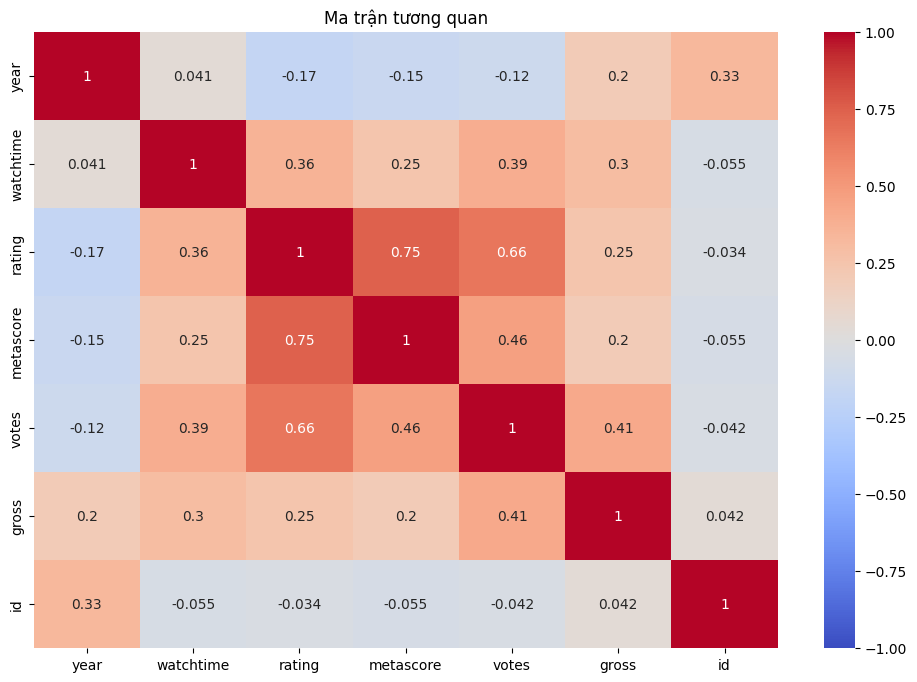

In [49]:
numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan')
plt.show()


In [50]:
# Tính toán mối tương quan giữa các biến
correlation_matrix = data[['metascore', 'votes', 'rating', 'gross']].corr()
print(correlation_matrix)

           metascore     votes    rating     gross
metascore   1.000000  0.463131  0.746618  0.200765
votes       0.463131  1.000000  0.658120  0.414698
rating      0.746618  0.658120  1.000000  0.246819
gross       0.200765  0.414698  0.246819  1.000000


## Tiền xử lý

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)  
tfidf_matrix = vectorizer.fit_transform(data['keywords']).toarray()
pca = PCA(n_components=20)  
tfidf_reduced = pca.fit_transform(tfidf_matrix)

X_others = data[['metascore', 'votes', 'rating']].values
X_combined = np.hstack((X_others, tfidf_reduced))

scaler = StandardScaler()
X_combined = scaler.fit_transform(X_combined)

y = data['gross']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


## Huấn luyện mô hình

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Hàm đánh giá mô hình
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}:\nR²: {r2:.4f} | MSE: {mse:.2f} | MAE: {mae:.2f}\n")
    return {'Model': name, 'R²': r2, 'MSE': mse, 'MAE': mae}

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    result = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    results.append(result)

results_df = pd.DataFrame(results)
print("Tổng kết kết quả đánh giá mô hình:")
print(results_df)


Linear Regression:
R²: 0.2047 | MSE: 72989928848617776.00 | MAE: 190770322.11

Ridge Regression:
R²: 0.2049 | MSE: 72967522026255392.00 | MAE: 190730047.84

Random Forest:
R²: 0.2306 | MSE: 70608973502084200.00 | MAE: 176748462.44

XGBoost:
R²: 0.1414 | MSE: 78797169861385504.00 | MAE: 189236934.81

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5430
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] Start training from score 427341789.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

Sau khi huấn luyện, chọn mô hình LightGBM là mô hình tối ưu nhất để thực hiện mục tiêu của đề tài (đánh giá tầm quan trọng của các biến đối với doanh thu) 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5430
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] Start training from score 427341789.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

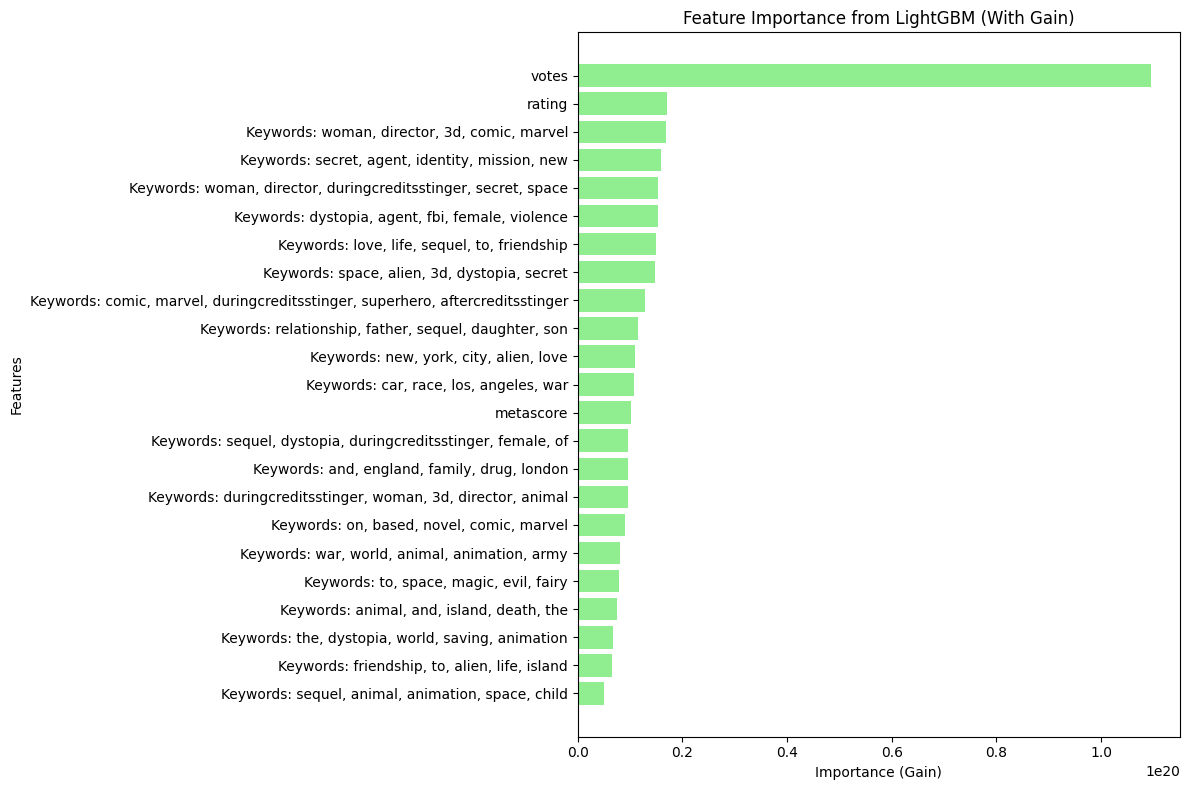

In [53]:
import lightgbm as lgb 
import matplotlib.pyplot as plt
import pandas as pd

# Huấn luyện lại mô hình LightGBM
best_lgbm = lgb.LGBMRegressor(n_estimators=100, random_state=42)
best_lgbm.fit(X_train, y_train)

# Lấy tầm quan trọng của các đặc trưng theo "gain"
gain_importances = best_lgbm.booster_.feature_importance(importance_type='gain')

feature_names = ['metascore', 'votes', 'rating'] + [f'TFIDF_{i}' for i in range(tfidf_reduced.shape[1])]

# Ánh xạ các từ khóa quan trọng nhất từ PCA
top_keywords_per_component = []
for i, component in enumerate(pca.components_):
    top_indices = component.argsort()[-5:][::-1]  
    top_keywords = [tfidf_keywords[index] for index in top_indices]
    top_keywords_per_component.append(", ".join(top_keywords))

mapped_features = ['metascore', 'votes', 'rating'] + [f"Keywords: {top_keywords_per_component[i]}" for i in range(len(top_keywords_per_component))]

# Tạo DataFrame với tầm quan trọng theo "gain"
lgbm_importance_df = pd.DataFrame({
    'Feature': mapped_features,
    'Importance (Gain)': gain_importances
}).sort_values(by='Importance (Gain)', ascending=False)

#pd.options.display.float_format = '{:,.0f}'.format
print("Bảng tầm quan trọng của các biến từ mô hình LightGBM (Gain):")
print(lgbm_importance_df)

plt.figure(figsize=(12, 8))
plt.barh(lgbm_importance_df['Feature'], lgbm_importance_df['Importance (Gain)'], color='lightgreen')
plt.xlabel('Importance (Gain)')
plt.ylabel('Features')
plt.title('Feature Importance from LightGBM (With Gain)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
